In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from sklearn.metrics import explained_variance_score
from sklearn import metrics
warnings.filterwarnings(action = 'ignore')
import seaborn as sns

In [2]:
data = pd.read_csv('transformed_house_price2.csv')
data.head()

,No of Bedrooms,No of Bathrooms,Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Latitude,...,Zipcode_Group_Zipcode_Group_1,Zipcode_Group_Zipcode_Group_2,Zipcode_Group_Zipcode_Group_3,Zipcode_Group_Zipcode_Group_4,Zipcode_Group_Zipcode_Group_5,Zipcode_Group_Zipcode_Group_6,Zipcode_Group_Zipcode_Group_7,Zipcode_Group_Zipcode_Group_8,Zipcode_Group_Zipcode_Group_9,Sale_Price
0,-0.398724,-1.447497,-0.228368,-0.915389,-0.30579,-0.563993,-0.734765,-0.658697,0.544734,-0.352572,...,-0.350481,-0.482158,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158,221900.0
1,-0.398724,0.175717,-0.189935,0.936817,-0.30579,-0.563993,0.460954,0.245134,0.680915,1.161649,...,-0.350481,2.074011,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158,538000.0
2,-1.474115,-1.447497,-0.123352,-0.915389,-0.30579,-1.468566,-1.229961,-0.658697,1.293731,1.283624,...,-0.350481,2.074011,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158,180000.0
3,0.676667,1.149646,-0.244060,-0.915389,-0.30579,-0.563993,-0.891778,1.397518,0.204281,-0.283284,...,-0.350481,-0.482158,2.383223,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158,604000.0
4,-0.398724,-0.148926,-0.169704,-0.915389,-0.30579,0.340581,-0.130866,-0.658697,-0.544715,0.409591,...,-0.350481,-0.482158,-0.419600,2.087275,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158,510000.0


In [3]:
X=data.drop(columns=['Sale_Price'])
Y=data['Sale_Price']

In [4]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,random_state=42,test_size=0.2)
#x_train,x_valid,y_train,y_valid=train_test_split(x_train_full,y_train_full,random_state=42)

In [5]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression(normalize = True)
lr.fit(x_train, y_train)

LinearRegression(normalize=True)

In [6]:
predictions = lr.predict(x_test)

In [7]:
print('Variance Regression Score: ',explained_variance_score(y_test,predictions))
print("Mean Squared Error: ",metrics.mean_squared_error(y_test, predictions))
print("R2 score",metrics.r2_score(y_test,predictions))

Variance Regression Score:  0.8450033721536753
Mean Squared Error:  9892778444.825283
R2 score 0.844999914734196


In [8]:
#residuals
residuals = predictions - y_test

residual_table = pd.DataFrame({'residuals':residuals,
                    'predictions':predictions})
residual_table = residual_table.sort_values( by = 'predictions')

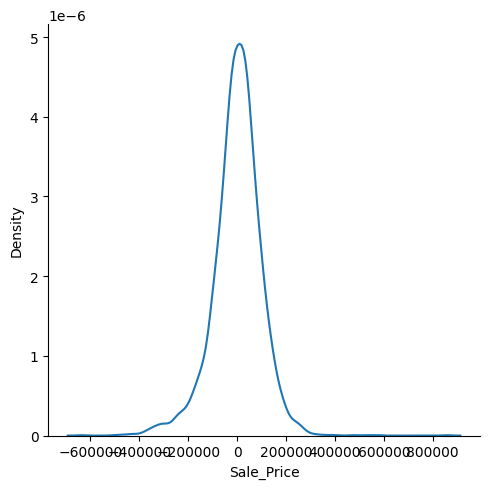

In [9]:
sns.displot(residuals,kind="kde")

In [10]:
z = [i for i in range(int(residual_table['predictions'].max()))]
k = [0 for i in range(int(residual_table['predictions'].max()))]

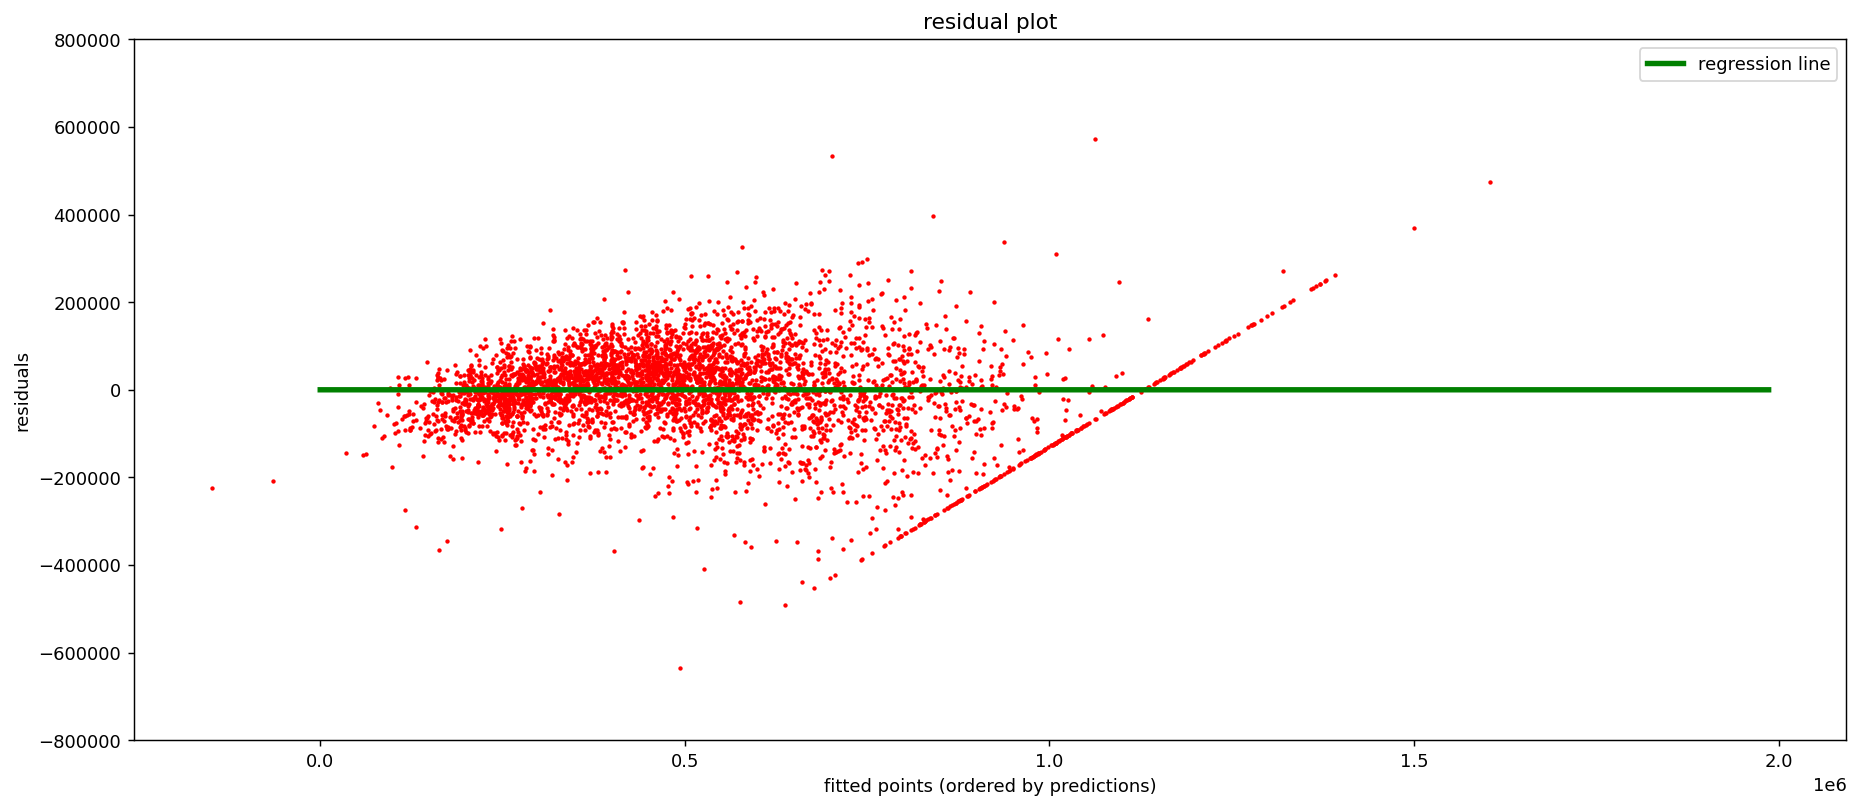

In [11]:
plt.figure(dpi = 130, figsize = (17,7))

plt.scatter( residual_table['predictions'], residual_table['residuals'], color = 'red', s = 2)
plt.plot(z, k, color = 'green', linewidth = 3, label = 'regression line')
plt.ylim(-800000, 800000)
plt.xlabel('fitted points (ordered by predictions)')
plt.ylabel('residuals')
plt.title('residual plot')
plt.legend()
plt.show()

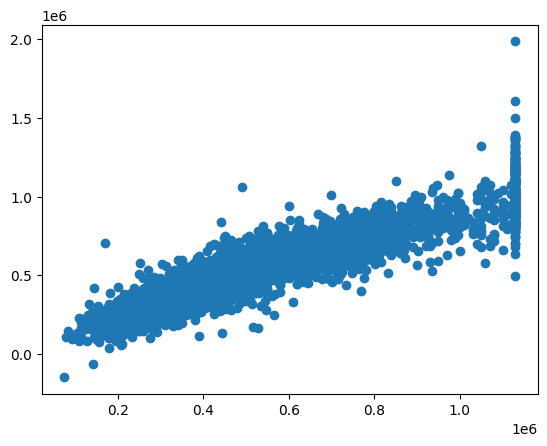

In [12]:
plt.scatter(y_test,predictions)

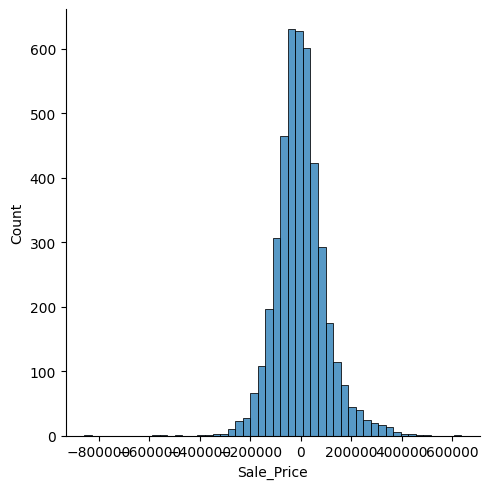

In [13]:
import seaborn as sns
sns.displot((y_test-predictions),bins=50)

In [14]:
coefficients_table = pd.DataFrame({'column': x_train.columns,
                                  'coefficients': lr.coef_})
coefficient_table = coefficients_table.sort_values(by = 'coefficients')


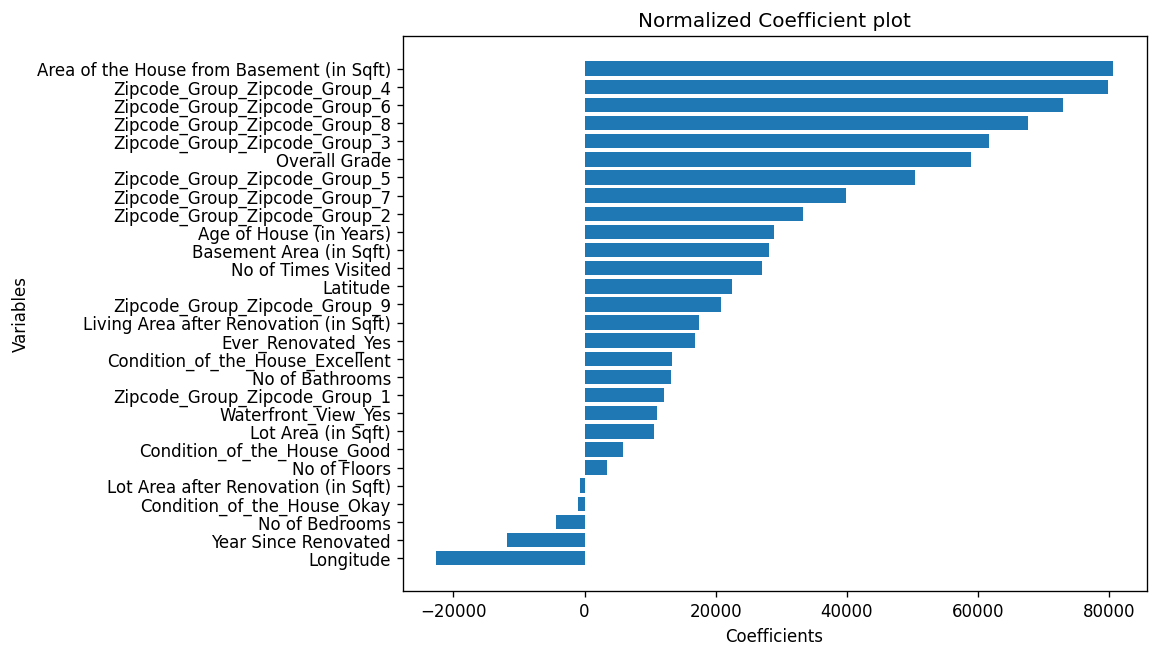

In [15]:
#model coefficients
plt.figure(figsize=(8, 6), dpi=120)
x = coefficient_table['column']
y = coefficient_table['coefficients']
plt.barh( x, y)
plt.xlabel( "Coefficients")
plt.ylabel('Variables')
plt.title('Normalized Coefficient plot')
plt.show()

In [16]:
#KNN
from sklearn.neighbors import KNeighborsRegressor

In [17]:
model = KNeighborsRegressor(n_neighbors=30)

In [18]:
model.fit(x_train, y_train)

KNeighborsRegressor(n_neighbors=30)

In [19]:
y_pred = model.predict(x_test)

In [20]:
print('Variance Regression Score: ',explained_variance_score(y_test,y_pred))
print("Mean Squared Error: ",metrics.mean_squared_error(y_test, y_pred))
print('R2 Score:',metrics.r2_score(y_test,y_pred))

Variance Regression Score:  0.8447133047440258
Mean Squared Error:  10132355054.530516
R2 Score: 0.8412462276240367


<AxesSubplot: xlabel='Sale_Price', ylabel='Density'>

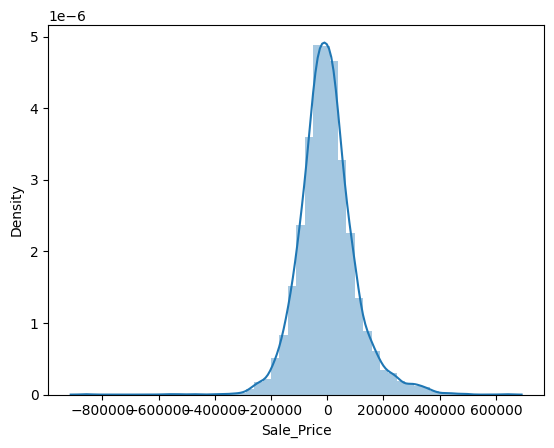

In [21]:
import seaborn as sns
sns.distplot(y_test-predictions)

In [22]:

x_new=x_test[2:5]


In [23]:
y_pred=model.predict(x_new)
print(y_pred)

[278997.23333333 430240.9        490089.5       ]


In [24]:
print(y_test[2:5])

4044     267000.0
21267    365000.0
10494    397000.0
Name: Sale_Price, dtype: float64
